In [61]:
# General import and load data
import pandas as pd
import numpy as np
import os
import re
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn import tree

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


# if matplotlib is not set inline, you will not see plots
#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline

url_df = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/df_procesado_genderandage.csv'
url_df45_sinoutliers = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/DATASETS%20DEFINITIVOS/PROCESSED/Sin_outliers/df_v45sinoutliers.csv'
df = pd.read_csv(url_df45_sinoutliers)
df = df.drop(['Unnamed: 0'], axis = 1)
#Tutotial: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook

In [62]:
y = df['MET_SYM']
vars_descarte = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'MET_SYM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
X = df.drop(vars_descarte, axis = 1)

vars_descarte_ms = ['REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'REQ_SUM', 'BPXSY1', 'BPXDI1', 'BMXWAIST', 'LBXTR', 'BPQ090D', 'LBDHDD', 'BPQ040A', 'LBXGLU', 'DIQ070', 'BMXHT', 'BMXWT', 'SEQN', 'DPQ050', 'MCQ010', 'DBQ700', 'ALQ130', 'ALQ130_Tramos', 'PAQ665', 'PAQ620', 'PAQ605', 'BPQ050A']
df_ms = df.drop(vars_descarte_ms, axis = 1)

In [63]:
#SIN PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
#CON PCA
#Normalización
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Aplicar PCA 
#fijamos componentes
pca = PCA(n_components=26)
X_pca = pca.fit_transform(X)
X_pca.shape
#Separar datos en train, test, entrada y salida despues del PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
cols = X_train.columns

In [64]:
#SCALER

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

X_train.describe()

,DIQ010,INQ020,INDFMMPI,INDFMMPC,BMXBMI,BPQ030,LBXIN,MCQ080,MCQ220,MCQ300C,...,DPQ030,DPQ040,RIDAGEYR_Tramos,Etnia_1.0,Etnia_2.0,Etnia_3.0,Etnia_4.0,Etnia_6.0,Etnia_7.0,WHI
count,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,...,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04,2.149200e+04
mean,4.904880e-17,1.667349e-16,7.758957e-17,-9.147510e-16,6.311514e-17,-1.150976e-15,2.837288e-16,6.109843e-16,-9.760117e-16,-3.157823e-17,...,3.087776e-16,1.264488e-15,5.011088e-16,3.186286e-16,-6.410696e-18,3.021241e-16,7.362434e-16,-5.097924e-16,3.867520e-16,-3.787528e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.958616e-01,-1.850909e+00,-1.530960e+00,-1.276009e+00,-2.129124e+00,-5.762041e-01,-9.753382e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.468636e+00,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-2.244894e+00
25%,-3.958616e-01,5.402750e-01,-7.843110e-01,-1.276009e+00,-6.933691e-01,-5.762041e-01,-2.149142e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-7.418592e-01,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-7.136816e-01
50%,-3.958616e-01,5.402750e-01,-6.557375e-02,9.127443e-01,-1.303280e-01,-5.762041e-01,-1.497109e-01,-6.852288e-01,-2.951299e-01,-7.409271e-01,...,-5.418423e-01,-6.570211e-01,-1.508201e-02,-4.153361e-01,-3.414433e-01,-7.321343e-01,-5.460217e-01,-3.867179e-01,-2.034207e-01,-4.410566e-02
75%,-3.958616e-01,5.402750e-01,5.362815e-01,9.127443e-01,4.749411e-01,-5.762041e-01,-9.212864e-02,1.459367e+00,-2.951299e-01,1.349660e+00,...,6.128701e-01,4.830320e-01,7.116951e-01,-4.153361e-01,-3.414433e-01,1.365870e+00,-5.460217e-01,-3.867179e-01,-2.034207e-01,5.695696e-01
max,2.663968e+00,5.402750e-01,1.958055e+00,9.127443e-01,8.118224e+00,1.735496e+00,5.680503e+01,1.459367e+00,3.388338e+00,1.349660e+00,...,2.922295e+00,2.763138e+00,1.438472e+00,2.407689e+00,2.928744e+00,1.365870e+00,1.831429e+00,2.585865e+00,4.915921e+00,5.447689e+00


In [9]:
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [16]:
from sklearn.metrics import confusion_matrix
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[[2831  384]
 [ 324 1834]]
Model accuracy score : 0.8682


In [37]:
#Choose all predictors except target & IDcols

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=150,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1,
 seed=27)
xgb2.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, max_depth=5, min_child_weight=3,
              n_estimators=150, nthread=5, seed=27, subsample=0.8)

In [38]:
y_pred = xgb2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[[2836  379]
 [ 304 1854]]
Model accuracy score : 0.8729


In [43]:
xgb3 = XGBClassifier(
  max_depth=5,
  subsample=0.8,
  objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1,
 seed=27)


params = {
    'learning_rate': [0.05, 0.1],
   ' min_child_weight':[2,3],
    'colsample_bytree':[0.6, 0.8],
    'n_estimators':[50, 100, 150]
    }

clfG = GridSearchCV(xgb3, param_grid= params, scoring = 'roc_auc' )

In [45]:
clfG = clfG.fit(X_train, y_train)

clfG.best_params_

{' min_child_weight': 2,
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'n_estimators': 150}

In [65]:
#modelo con todo ajustado
xgb4 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=150,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=5,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_train, y_train)
y_pred = xgb4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

y_score1 = xgb4.predict_proba(X_test)[:,1]
print('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))

[[2833  382]
 [ 319 1839]]
Model accuracy score : 0.8695
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3215
           1       0.83      0.85      0.84      2158

    accuracy                           0.87      5373
   macro avg       0.86      0.87      0.86      5373
weighted avg       0.87      0.87      0.87      5373

roc_auc_score for xgb:  0.9472459523462915


In [67]:
#metricas
y_pred = xgb4.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


print(classification_report(y_test, y_pred))


[[2833  382]
 [ 319 1839]]
Model accuracy score : 0.8695
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3215
           1       0.83      0.85      0.84      2158

    accuracy                           0.87      5373
   macro avg       0.86      0.87      0.86      5373
weighted avg       0.87      0.87      0.87      5373



roc_auc_score for DecisionTree:  0.9472459523462915


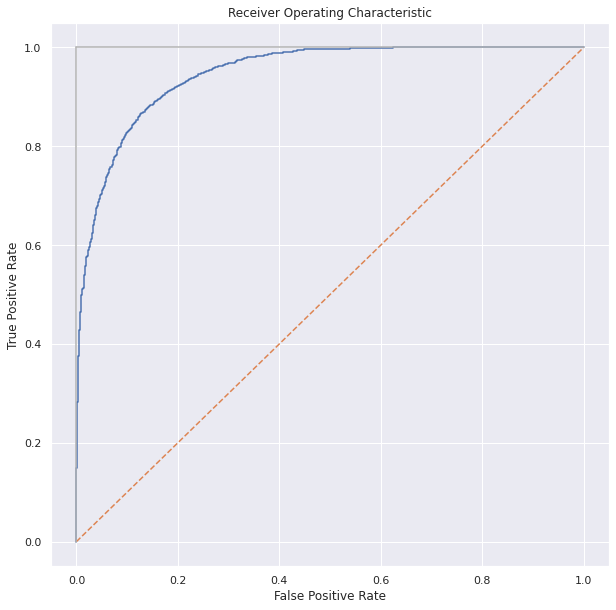

In [68]:
#curva roc

from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = xgb3



false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


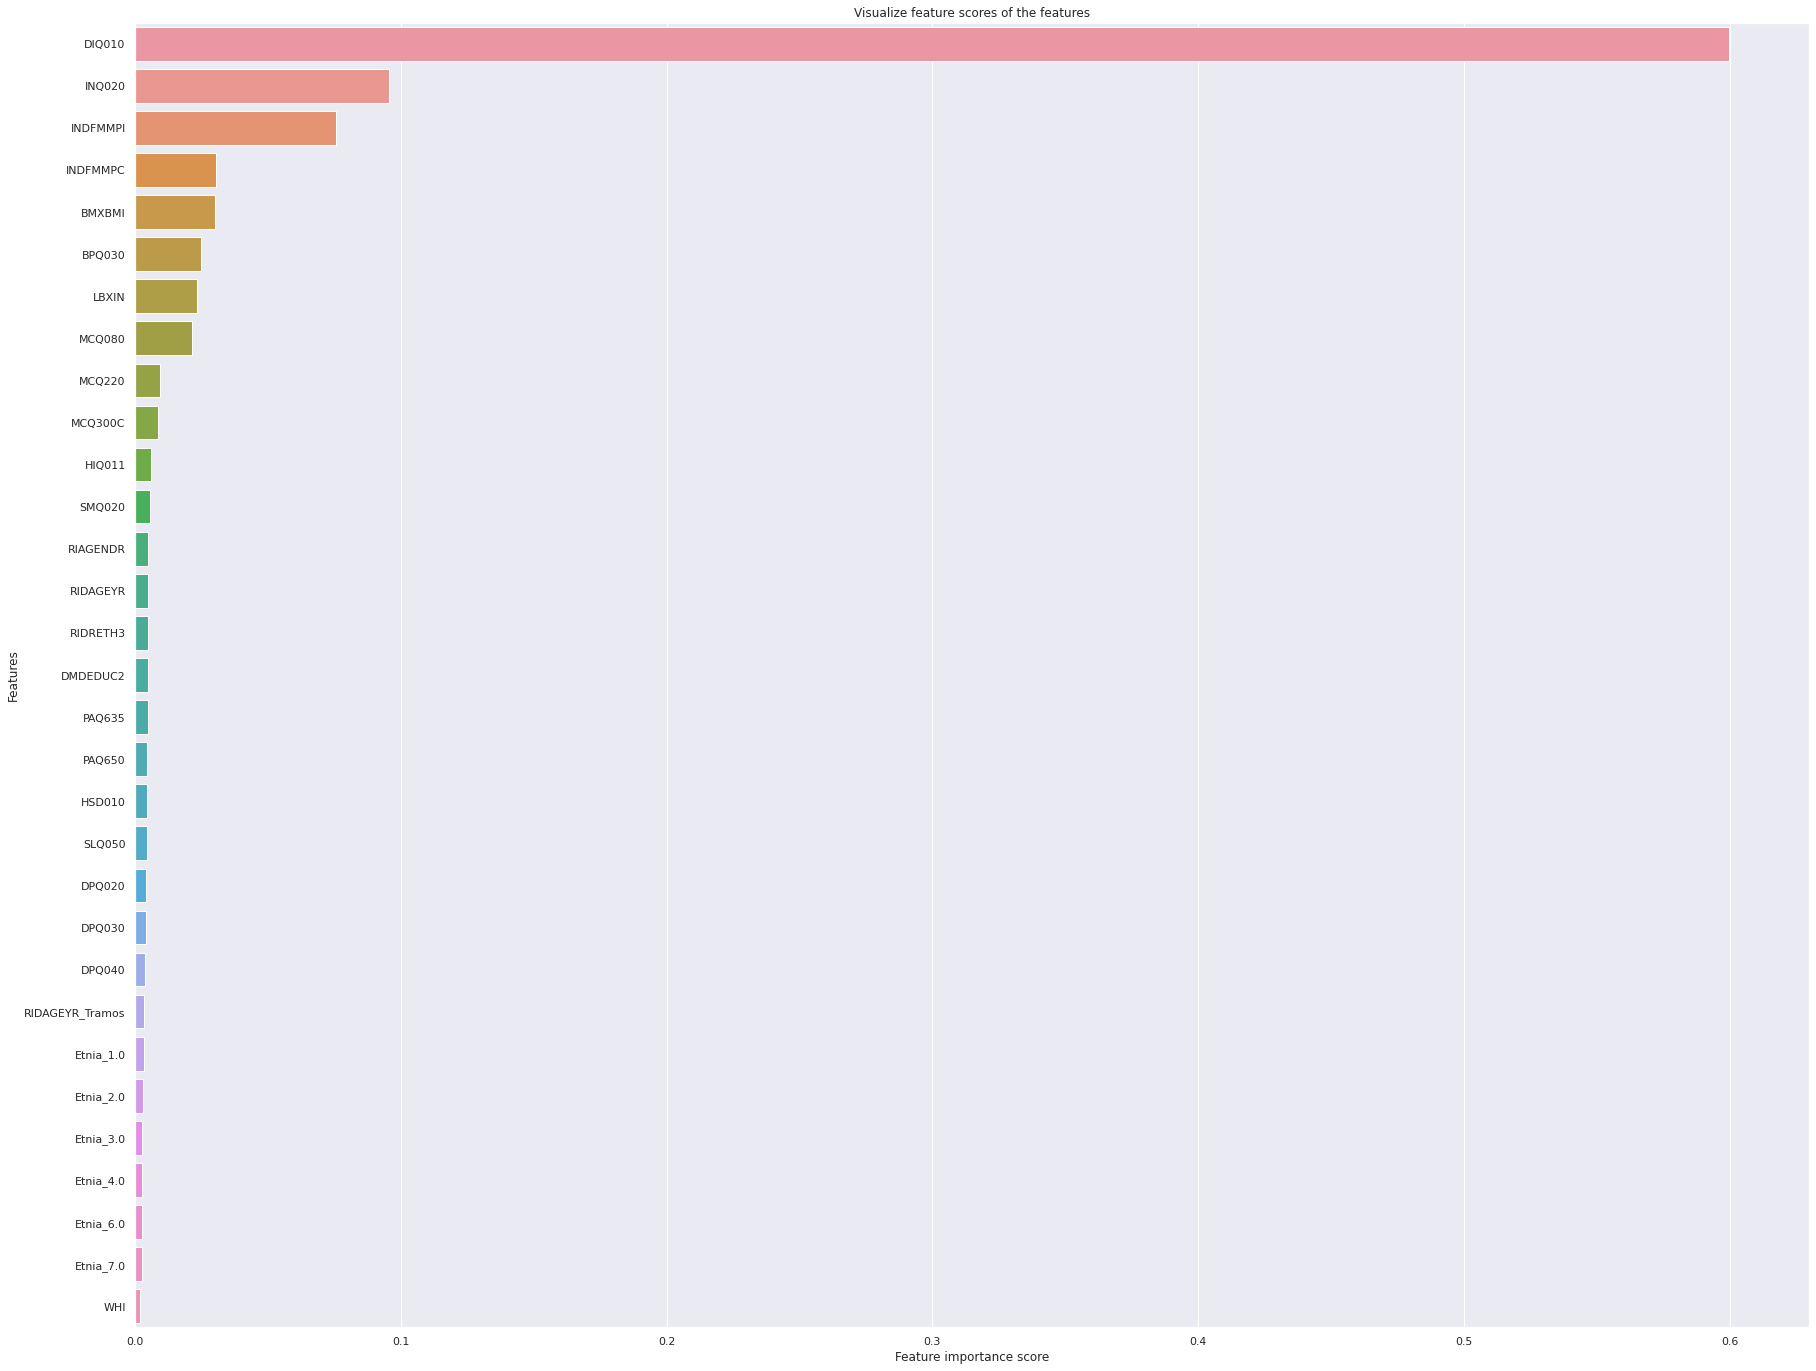

In [57]:
#importancia de parametros

# Creating a seaborn bar plot
feature_scores = pd.Series(xgb4.feature_importances_, index=X.columns).sort_values(ascending=False)


f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=X.columns)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(X.columns)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [69]:
feature_scores

BPQ030             0.599981
RIDAGEYR_Tramos    0.095356
RIDAGEYR           0.075390
RIAGENDR           0.030338
DIQ010             0.029858
WHI                0.024638
LBXIN              0.023237
BMXBMI             0.021326
MCQ080             0.009184
SMQ020             0.008447
Etnia_4.0          0.006014
SLQ050             0.005529
HSD010             0.004918
PAQ650             0.004883
INQ020             0.004847
MCQ300C            0.004797
HIQ011             0.004750
RIDRETH3           0.004351
DMDEDUC2           0.004266
DPQ030             0.004263
DPQ040             0.004169
DPQ020             0.004060
INDFMMPI           0.003688
Etnia_1.0          0.003360
Etnia_6.0          0.003289
Etnia_3.0          0.002861
MCQ220             0.002696
PAQ635             0.002685
INDFMMPC           0.002576
Etnia_2.0          0.002485
Etnia_7.0          0.001760
dtype: float32

In [70]:
#overfitting

#overfitting

#tree train 7 test accuracy against max depth

import numpy as np
import matplotlib.pyplot as plt

max_depth_list = [1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    model = xgb4(max_depth=x) 
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_errors.append(metrics.accuracy_score(y_train, y_train_pred))
    test_errors.append(metrics.accuracy_score(y_test, y_test_pred))

plt.subplots(1, figsize=(10,10))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph



TypeError: ignored

roc_auc_score for DecisionTree:  0.9472459523462915


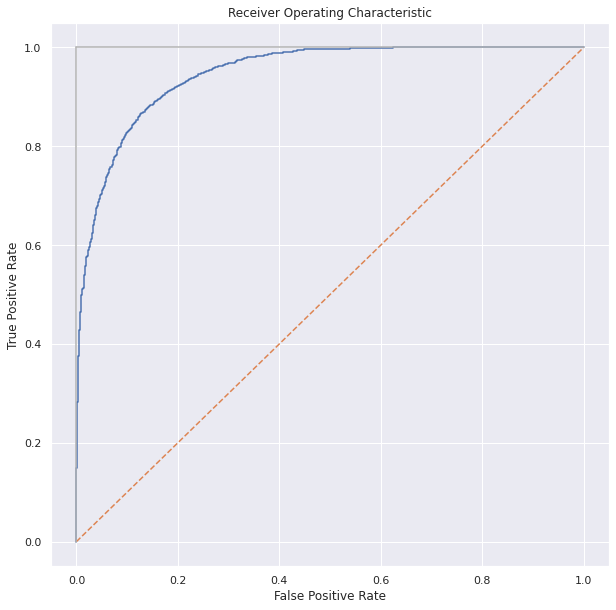

In [71]:
#curva roc

from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = xgb4



false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [73]:
#curva roc

from sklearn.metrics import roc_curve, roc_auc_score
clf_tree = xgb4



false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(X_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(X_test, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: ignored